# I. Import các thư viện cần thiết

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Khám phá dữ liệu - EDA

## 1. Load dataset đã qua tiền xử lý

In [67]:
df = pd.read_csv("./data/marketing_campaign_cleaned.csv")
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Age Group,Kids,Total Purchases,Spent,Family Size
0,5524,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,...,False,3,11,True,64,51-65,0,25,1617,1
1,2174,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,...,False,3,11,False,67,66+,2,6,27,3
2,4141,Graduation,In Relationship,71613.0,2013-08-21,26,426,49,127,111,...,False,3,11,False,56,51-65,0,21,776,2
3,6182,Graduation,In Relationship,26646.0,2014-02-10,26,11,4,20,10,...,False,3,11,False,37,36-50,1,8,53,3
4,5324,PhD,In Relationship,58293.0,2014-01-19,94,173,43,118,46,...,False,3,11,False,40,36-50,1,19,422,3


Kiểm tra số dòng và cột của dữ liệu

In [68]:
df.shape

(2236, 32)

Kiểm tra kiểu dữ liệu của các cột

In [69]:
df.dtypes

ID                       int64
Education               object
Marital_Status          object
Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3              bool
AcceptedCmp4              bool
AcceptedCmp5              bool
AcceptedCmp1              bool
AcceptedCmp2              bool
Complain                  bool
Z_CostContact            int64
Z_Revenue                int64
Response                  bool
Age                      int64
Age Group               object
Kids                     int64
Total Purchases          int64
Spent                    int64
Family Size              int64
dtype: o

Nhìn chung, kiểu dữ liệu đã sẵn sàng cho việc phân tích

## 3. Phân tích khách hàng

Bao gồm:

- Phân tích khách hàng

- Phân tích sản phẩm

### a. Phân tích trên một thuộc tính

**Phân tích về thu nhập của khách hàng**

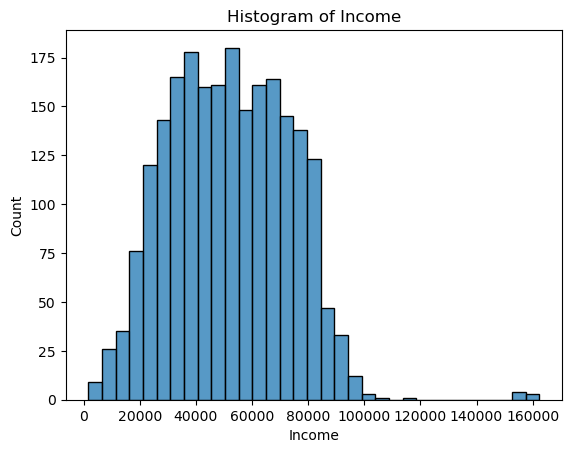

In [70]:
sns.histplot(df['Income'])
plt.title("Histogram of Income");

- Nhìn chung, khách hàng của chúng ta có mức thu nhập tập trung quanh mức trung bình

- Khách hàng với thu nhập thấp hoặc cao hơn mức 80000 có xu hướng ít mua sản phẩm của chúng ta

- Ngoài ra, cũng có số ít khách hàng với thu nhập rất cao


Lý do chọn `Histogram`: mục đích để quan sát được sự phân bố trong thu nhập của khách hàng như thế nào


**Phân tích về học vấn của khách hàng**

Text(0.5, 1.0, 'Education')

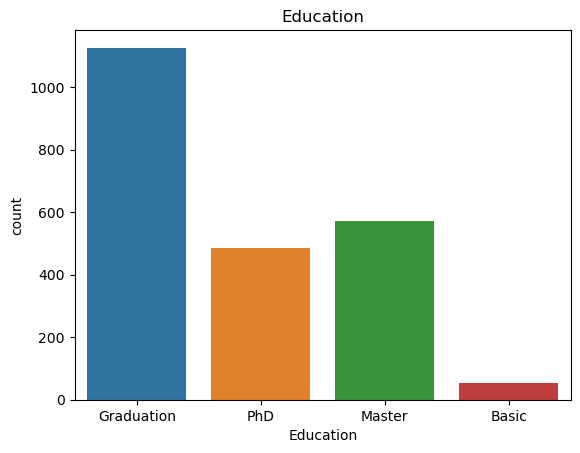

In [71]:
sns.countplot(x='Education', data=df, hue='Education');
plt.title("Education")

- Nhìn chung, đa số khách hàng đều có bằng đại học

- Bên cạnh đó, một số lượng tương đối đáng kể có học vấn là Thạc sĩ, Tiến sĩ

- Số lượng khách hàng có học vấn phổ thông tương đối ít


Qua đó ta thấy được:

- Phần lớn khách hàng của công ty có học vấn khá cao

- Có thể thấy họ có thể tạo ra thu nhấp tương đối ổn và sẵn sàng mua sản phẩm của công ty. Tuy nhiên, với học vấn cao có thể sẽ khắt khe trong chất lượng sản phẩm để xứng đáng với giá tiền sản phẩm, chất lượng dịch vụ...

Lý do chọn `barchart`: mục tiêu là để so sánh số lượng khách hàng theo học vấn


**Phân tích về thời điểm mua hàng lần đầu**

Trung binh so luong khach hang moi moi thang: 186.33333333333334


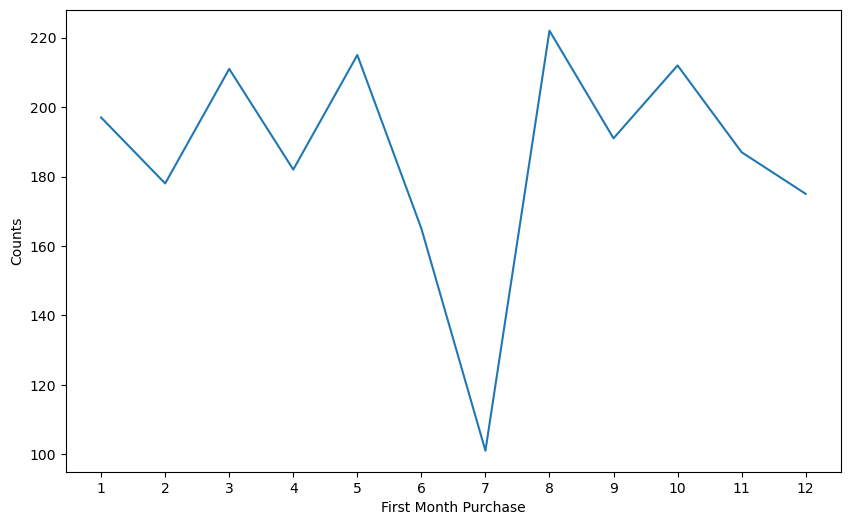

In [72]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['First Month Purchase'] = df['Dt_Customer'].dt.month
df_counts = df.groupby('First Month Purchase').size().reset_index(name='Counts')
print("Trung binh so luong khach hang moi moi thang:",df_counts['Counts'].mean())
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_counts, x='First Month Purchase', y='Counts');
plt.xticks(np.arange(1, 13, 1));

- Số lượng khách hàng mua hàng lần đầu phân bố không ổn định giữa cách tháng và có nhiều dao động

- Số lượng khách hàng mới giảm đột ngột từ sau tháng 5 đến tháng 7

- Ở tháng 7, số lượng khách hàng mới là ít nhất

- Qua tới tháng 8 thì lượng khách hàng đã tăng trở lại

- Trung bình mỗi tháng, công ty có thêm 186 khách hàng mới

Qua đó, ta có thể rút ra về sự giảm sút trong các tháng 5, 6, 7:

- Có thể những sản phẩm hiện tại là chưa phù hợp trong tháng 

- Nhiệt độ và thời tiết có thể là nguyên nhân khiến cho sản phẩm khó tiếp cận được khách hàng

- Tại Brazil, những tháng 5, 6, 7 là những tháng có nhiệt độ nóng nhất năm. Qua đó, một số sản phẩm sẽ khó tiệp cận được khách hàng do đặc tính sản phẩm có thể không phù hợp


Lý do chọn `line chart`: quan sát sự thay đổi, xu hướng của số lượng khách hàng mới theo thời gian (tháng)


In [73]:
df['Response'].value_counts()

False    1902
True      334
Name: Response, dtype: int64

**Tỉ lệ mua hàng trên các nền tảng**

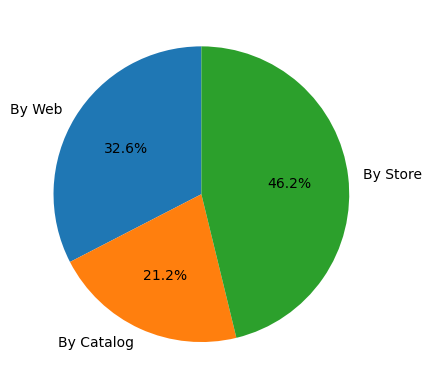

In [74]:
platform_counts={
    "By Web": df['NumWebPurchases'].sum(),
    "By Catalog": df['NumCatalogPurchases'].sum(),
    "By Store": df['NumStorePurchases'].sum(),
    #"By Deals": df['NumDealsPurchases'].sum()
}
plt.pie(platform_counts.values(), labels=platform_counts.keys(), autopct='%1.1f%%', startangle=90);


- Đa số khách hàng mua sản phẩm trực tiếp tại cửa hàng

- Tiếp đến là nền tảng Web

- Mua trên Catalog là ít nhất

- Tỉ lệ mua trực tiếp cao nên ta cần phải đầu tư cho giao diện của cửa hàng, đảm bảo thu hút khách hàng và nằm ở vị trị dễ đi đến.


Lý do sử dụng `pie chart`: để so sánh các thành phần với nhau, dễ quan sát hơn khi muốn có cái nhìn mang tính tổng thể

**Phân tích về số tỉ lệ than phiền trong dịch vụ**

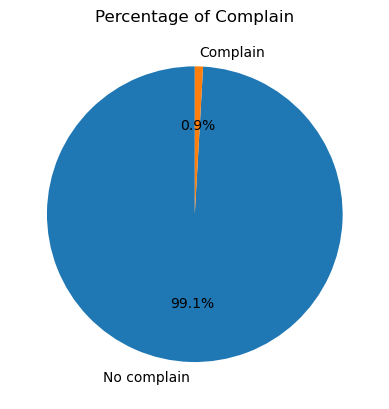

In [75]:
complain_counts = df['Complain'].value_counts()

plt.pie(complain_counts, labels=['No complain', 'Complain'], autopct='%1.1f%%', startangle=90);
plt.title('Percentage of Complain');


- Mức độ không hài lòng đối với dịch vụ của công ty chỉ ở mức 0.9%

- Đây là thông tin tích cực về hoạt động kinh doanh của công ty


Lý do dùng `pie chart`: để so sánh tỉ lệ giữa hai nhãn, dễ quan sát hơn khi muốn có cái nhìn mang tính tổng thể

**Phân tích tình trạng mối quan hệ của khách hàng**

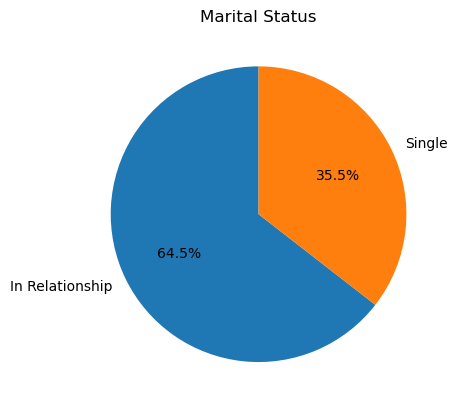

In [76]:
marital_status_counts = df['Marital_Status'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90);
plt.title('Marital Status');

- Gần 2/3 số lượng khách hàng đang trong mối quan hệ

- Chỉ 1/3 số lượng khách hàng trong trạng thái độc thân

Qua đó thấy được rằng:

- Tệp khách hàng đông đảo nhất là các cặp đôi. Bên cạnh đó, tệp khách hàng này khi thực hiện giao dịch cũng sẽ mua nhiều sản phẩm hơn vì khẩu phần ăn lớn như combo 2 người... . Qua đó, đem lại doanh số cao nhất

- Các sản phẩm trong tương lai nên nhắm đến các sản phẩm phù hợp cho cặp đôi để tối ưu hoá doanh thu

- Bên cạnh đó, số lượng khách hàng độc thân không phải ít, cần phải duy trì và cải thiện chất lượng của các sản phẩm phù hợp như: các phần ăn đơn

Lý do dùng `pie chart`: để so sánh tỉ lệ giữa hai nhãn, dễ quan sát hơn khi muốn có cái nhìn mang tính tổng thể

**Phân tích về nhóm tuổi của khách hàng**


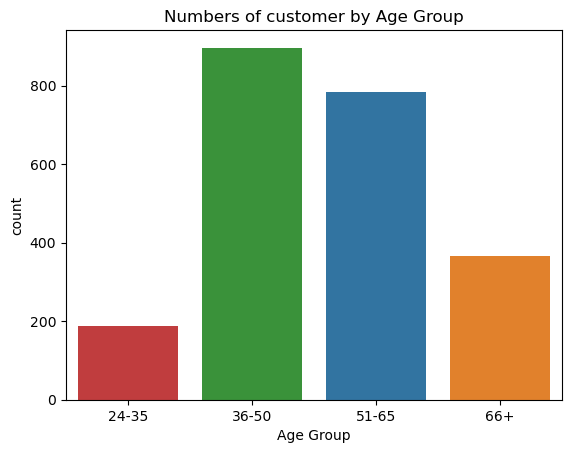

In [77]:
age_group_counts = df['Age Group'].value_counts()
age_group_counts.sort_index(inplace=True)
plt.title("Numbers of customer by Age Group")
sns.countplot(x='Age Group',hue='Age Group', data=df, order=age_group_counts.index);

- Một phát hiện thú vị rằng, tuy iFood là ứng dụng giao đồ ăn trực tuyến (dễ tiếp cận với giới trẻ) mà nhóm tuổi (24-35) lại chiếm số lượng ít nhất (thậm chí còn ít hơn nhóm trên 66 tuổi). Mặc dù, chúng ta vẫn thường thấy người trẻ tuổi thường xuyên chi tiền cho việc ăn uống là nhiều nhất

- Đa số khách hàng tập trung trong độ tuổi (36-50) và (51-65)

- Một thông tin tích cực được rút ra, mặc dù khách hàng có độ tuổi cao nhưng vẫn thao tác dễ dàng với ứng dụng iFood. Có vẻ có sự thành công trong việc thiết kế phần mềm, giao diện thân thiện. Trong tương lai, chúng ta nên giữ vững cách thiết kế hiện tại


Lý do chọn `barchart`: mục tiêu là để so sánh các đối tượng với nhau


**Phân tích về số lượng con của khách hàng**

In [78]:
kids_counts = df["Kids"].value_counts().sort_index()


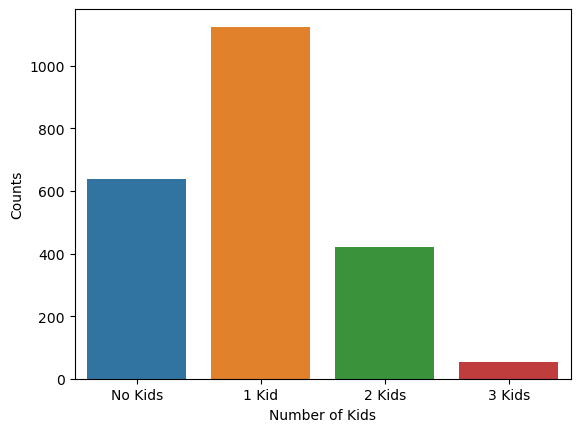

In [79]:
kids_counts = df["Kids"].value_counts().sort_index()
kids_counts = pd.DataFrame(kids_counts).reset_index().rename(columns={"index":"Number of Kids","Kids":"Counts"})
kids_counts["Number of Kids"] = ['No Kids', '1 Kid', '2 Kids', '3 Kids']
sns.barplot(kids_counts, x="Number of Kids", y='Counts', hue='Number of Kids');

- Khoảng 50.35% khách hàng có 1 con

- Khoảng 28.48% khách hàng có 0 con

- Khoảng 18.79% khách hàng có 2 con

- Khoảng 2.36% khách hàng có 3 con

- Nhìn chung, tệp khách hàng có con vẫn chiếm đa số. Do vậy cần bổ sung và cải thiện một số món ăn dành cho trẻ em để đảm bảo sẵn sàng phục vụ

**Phân tích về số lượng giao dịch của khách hàng**

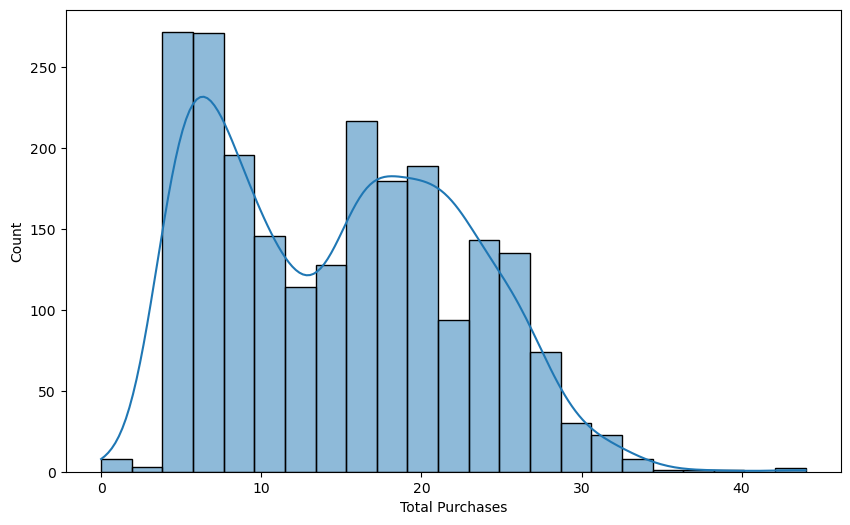

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Purchases'], kde=True);

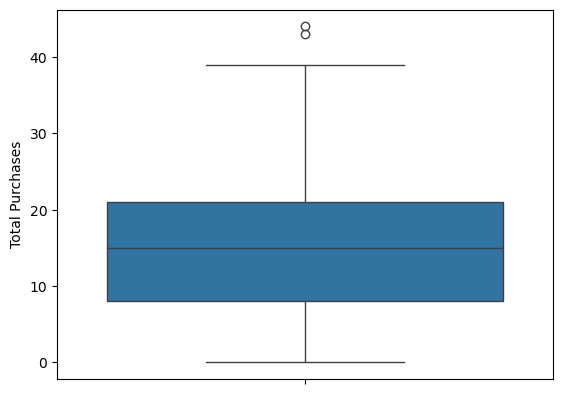

In [81]:
sns.boxplot(df['Total Purchases']);

- Số lượng sản phẩm được mua tập chung nhiều lần lượt ở mức: 5, 7 và 17 sản phẩm

- Ngooài ra, cũng có một điểm ngoại lệ (theo boxplot) cho thấy số lượng giao dịch rất lớn


Lý do dùng `histogram`: quan sát phân bổ của thuộc tính

Lý do dùng `boxplot`: tìm ra giá trị outlier

### b. Phân tích trên nhiều thuộc tính

**Liệu rằng có sự tương quan nào giữa thu nhập và chi tiêu của khách hàng**

<Axes: xlabel='Income', ylabel='Spent'>

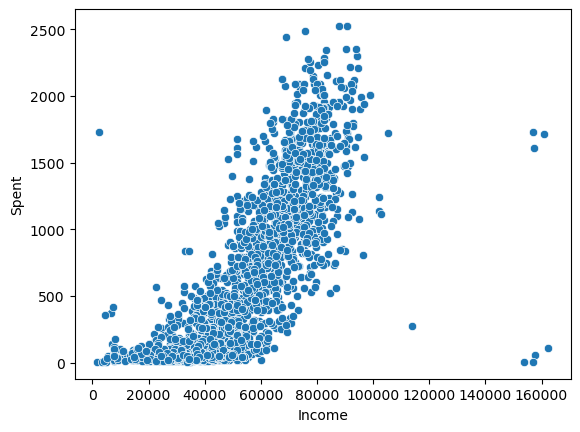

In [99]:
sns.scatterplot(df, x='Income', y='Spent')

- Nhìn chung, có sự tương quan nhẹ giữa thu nhập và chi tiêu. Thu nhập càng cao càng có xu hướng chi tiền nhiều hơn cho việc mua hàng

- Tuy nhiên cũng có một vài điểm ngoại lệ. Tuy thu nhập ít nhưng mua rất nhiều sản phẩm, thu nhập cao nhưng lại mua rất ít

- Có thể một số khách hàng thu nhập cao là khách hàng mới nên số lượng giao dịch chưa nhiều

Để thêm sự chi tiết, ta sẽ quan sát thêm cả thuộc tính `Education` để xem liệu rằng nó có bị ảnh hưởng bởi học vấn không?

In [83]:
df["Education"].value_counts()

Graduation    1126
Master         571
PhD            485
Basic           54
Name: Education, dtype: int64

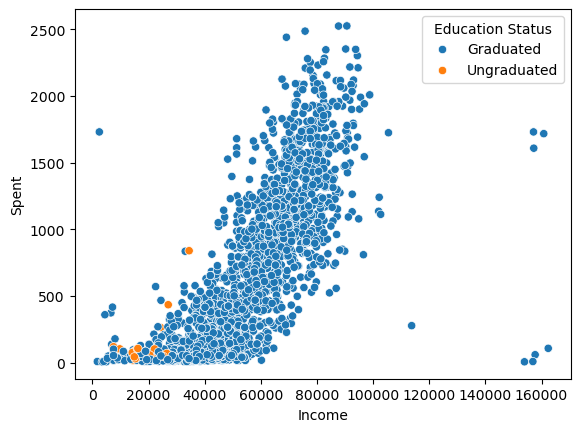

In [102]:
df['Education Status'] = df['Education'].apply(lambda x: "Graduated" if x in ['Graduation', 'Master', 'PhD'] else "Ungraduated")

sns.scatterplot(df, x='Income', y='Spent', hue='Education Status');


- Nhóm chưa tốt nghiệp có một ngoại lệ, tuy thu nhập ở mức trung bình nhưng có số lượng giao dịch tương đối cao

- Có vẻ như nhóm chưa tốt nghiệp có thu nhập ở mức thấp và có lượng giao dịch là ít nhất

- Nhóm đã tốt nghiệp chiếm đa số



Để thêm chi tiết, ta sẽ quan sát thêm số lượng con của khách hàng

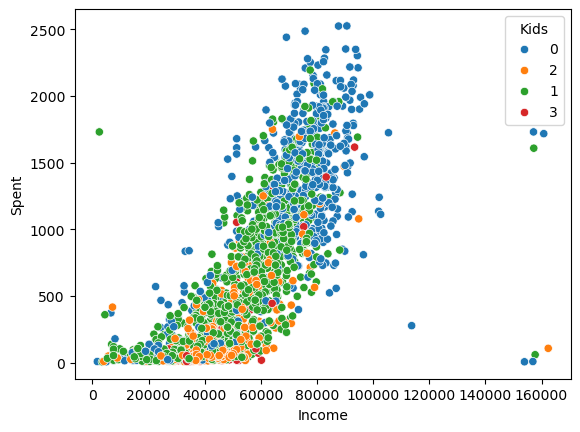

In [106]:
df['Kids'] = df['Kids'].astype("str")
sns.scatterplot(df, x='Income', y='Spent', hue='Kids');

- Những khách hàng không có con thường có thu nhập cao và chi tiêu nhiều nhất so với các nhóm còn lại. Lí do có thể là vì không có con nên chi tiêu cho giáo dục, nuôi dạy con cái được giảm bớt dẫn đến tiêu xài cho bản thân nhiều hơn

- Các 

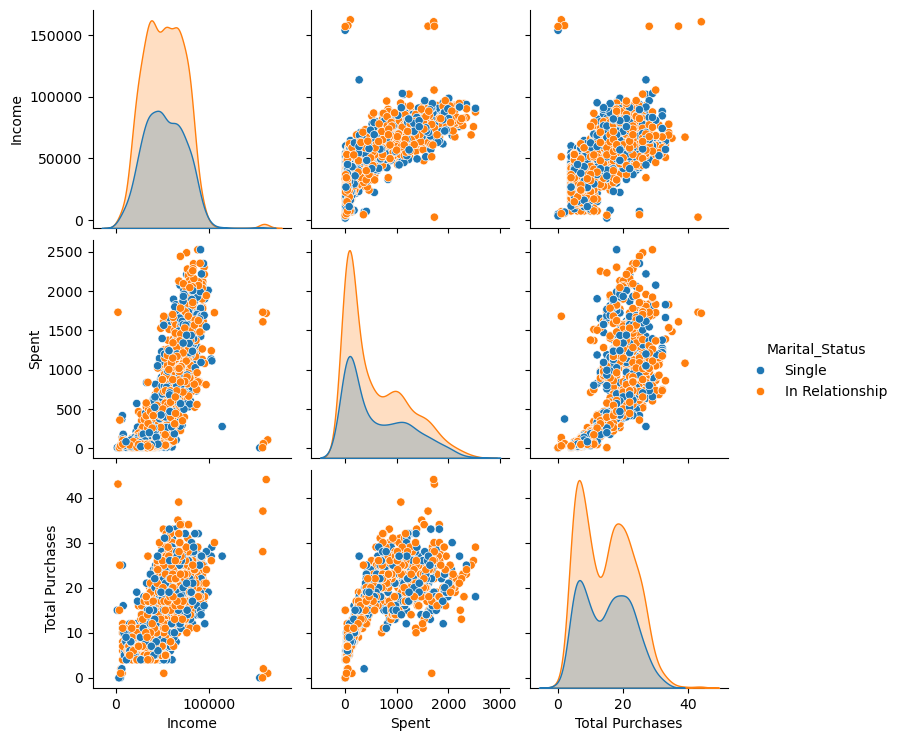

In [112]:
sns.pairplot(df[['Income', 'Spent','Total Purchases', 'Kids', 'Marital_Status']], hue = 'Marital_Status');

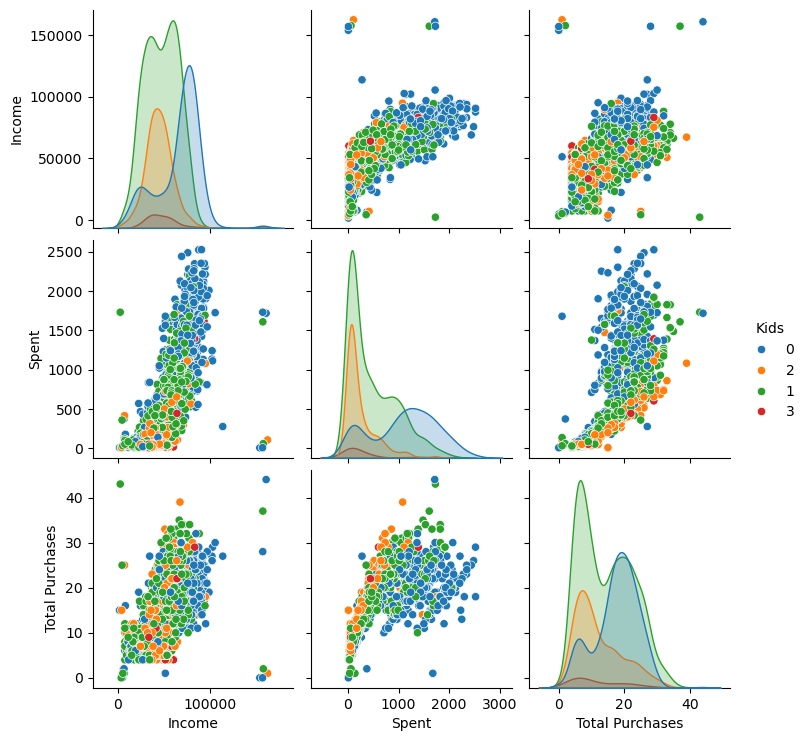

In [111]:
sns.pairplot(df[['Income', 'Spent','Total Purchases', 'Kids', 'Marital_Status']], hue = 'Kids');

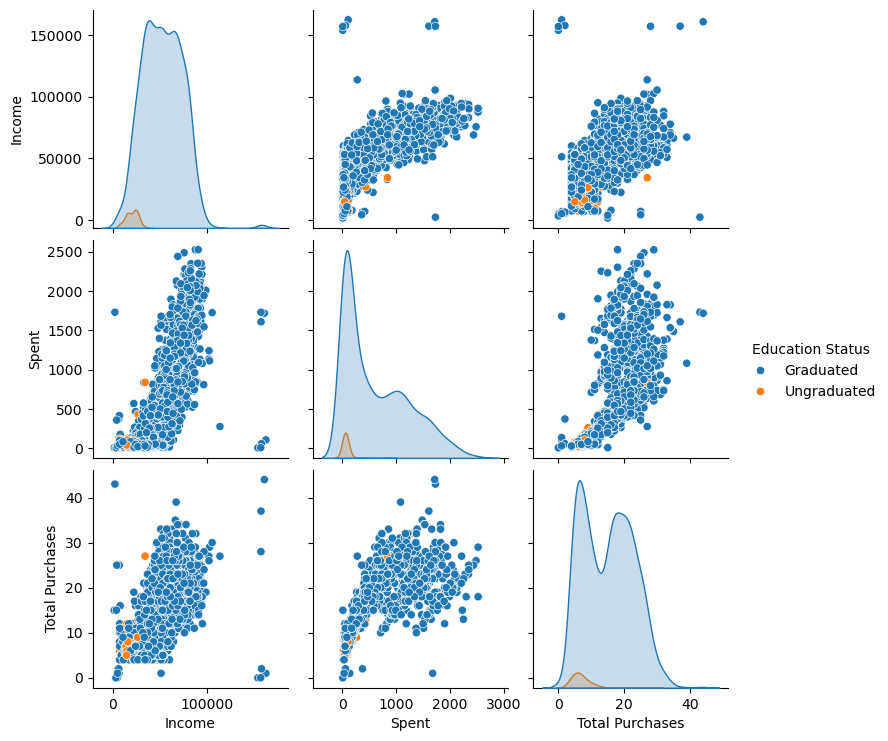

In [116]:
sns.pairplot(df[['Income', 'Spent','Total Purchases', 'Education Status']], hue = 'Education Status');

## 4. Phân tích về sản phẩm